In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 



In [7]:
list_of_samples = os.listdir('/Users/michael/Data')
data_directory = ('/Users/michael/Data')
sample_guide = pd.read_csv('/Users/michael/Git/Outdoor_microbiome/Local_analysis/Plate1_guide.csv', sep = '\t')
sample_guide['filename'] = sample_guide['filename'].str.split('.').str[0]
sample_guide

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
...,...,...,...,...,...,...,...,...,...,...
91,A2450525897_n01_LICRNA01_D12,D12,92,LIC148,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01
92,A2450525897_n01_LICRNA01_E12,E12,93,LIC149,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01
93,A2450525897_n01_LICRNA01_F12,F12,94,LIC150,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01
94,A2450525897_n01_LICRNA01_G12,G12,95,LIC151,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01


In [3]:
ex_file_name = list_of_samples[0]
ex_file_clean = ex_file_name.split('.')[0]
ex_file_clean

'A2450525897_n01_LICRNA01_H06'

In [8]:
example_sample_incl_quality = pd.read_csv(f'{data_directory}/{list_of_samples[0]}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'])
ex_quality_data = example_sample_incl_quality['Unstranded'][0:4].to_list()
ex_quality_data.append(example_sample_incl_quality['Forward'][3].item())
example_sample_read_quality_meta_data = pd.DataFrame(columns = ['Unmapped','Multimapping','No Feature','Ambiguous Unstranded', 'Ambiguous Forward'], data = [ex_quality_data], index = [ex_file_clean])
ex_cleaned_sample_data = pd.read_csv(f'{data_directory}/{list_of_samples[0]}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'], skiprows = 4)
ex_cleaned_sample_data


,Gene Name,Unstranded,Forward,Reverse
0,AT1G01010,0,0,0
1,AT1G01020,48,48,0
2,AT1G03987,0,0,0
3,AT1G01030,34,34,0
4,AT1G01040,53,111,162
...,...,...,...,...
38290,ArthCt118,0,0,4
38291,ArthCp083,30,30,0
38292,ArthCt111,0,0,0
38293,ArthCp084,2,0,2


In [ ]:

expression_data

""
AT1G01010
AT1G01020
AT1G03987
AT1G01030
AT1G01040
...
ArthCt118
ArthCp083
ArthCt111
ArthCp084


In [10]:
ex_cleaned_sample_data.sum()

Gene Name     AT1G01010AT1G01020AT1G03987AT1G01030AT1G01040A...
Unstranded                                              4718081
Forward                                                 5075118
Reverse                                                  404903
dtype: object

In [29]:

def Luke_file_parser(file_name, quality_dataframe, df_with_gene_names,data_directory = '/Users/michael/Data',):
    file_clean = file_name.split('.')[0]
    sample_incl_quality = pd.read_csv(f'{data_directory}/{file_name}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'])
    quality_data = sample_incl_quality['Unstranded'][0:4].to_list()
    quality_data.append(sample_incl_quality['Forward'][3].item())
    sample_read_quality_meta_data = pd.DataFrame(columns = ['Unmapped','Multimapping','No Feature','Ambiguous Unstranded', 'Ambiguous Forward'], data = [quality_data], index = [file_clean])
    quality_dataframe = pd.concat([quality_dataframe, sample_read_quality_meta_data])
    cleaned_sample_data = pd.read_csv(f'{data_directory}/{file_name}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'], skiprows = 4)
    df_with_gene_names[file_clean] = cleaned_sample_data['Forward']
    return quality_dataframe, df_with_gene_names


In [25]:
cleaned_sample_data = pd.read_csv(f'{data_directory}/{ex_file_name}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'], skiprows = 4)


In [ ]:
cleaned_sample_data['Forward'].to_list()

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [30]:
expression_data = pd.DataFrame(index = ex_cleaned_sample_data['Gene Name'].to_list())
quality_meta_data = pd.DataFrame(columns = ['Unmapped','Multimapping','No Feature','Ambiguous Unstranded', 'Ambiguous Forward'])
for file in list_of_samples:
    quality_meta_data, expression_data = Luke_file_parser(file, quality_meta_data, expression_data, data_directory)


In [32]:
expression_data

,A2450525897_n01_LICRNA01_H06,A2450525897_n01_LICRNA01_F06,A2450525897_n01_LICRNA01_E01,A2450525897_n01_LICRNA01_H10,A2450525897_n01_LICRNA01_F10,A2450525897_n01_LICRNA01_D04,A2450525897_n01_LICRNA01_A02,A2450525897_n01_LICRNA01_D08,A2450525897_n01_LICRNA01_D12,A2450525897_n01_LICRNA01_B05,...,A2450525897_n01_LICRNA01_A07,A2450525897_n01_LICRNA01_G06,A2450525897_n01_LICRNA01_A11,A2450525897_n01_LICRNA01_C05,A2450525897_n01_LICRNA01_E12,A2450525897_n01_LICRNA01_F03,A2450525897_n01_LICRNA01_H03,A2450525897_n01_LICRNA01_C09,A2450525897_n01_LICRNA01_E04,A2450525897_n01_LICRNA01_E08
AT1G01010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G01020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G03987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G01030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT1G01040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ArthCt118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArthCp083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArthCt111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ArthCp084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
sample_guide

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
...,...,...,...,...,...,...,...,...,...,...
91,A2450525897_n01_LICRNA01_D12,D12,92,LIC148,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01
92,A2450525897_n01_LICRNA01_E12,E12,93,LIC149,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01
93,A2450525897_n01_LICRNA01_F12,F12,94,LIC150,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01
94,A2450525897_n01_LICRNA01_G12,G12,95,LIC151,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01


In [36]:
quality_meta_data

,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward
A2450525897_n01_LICRNA01_H06,4328244,499905,321262,442619,51564
A2450525897_n01_LICRNA01_F06,4579055,780856,331588,745568,79267
A2450525897_n01_LICRNA01_E01,3004324,309156,135512,229101,26474
A2450525897_n01_LICRNA01_H10,2291624,408948,159867,259492,34365
A2450525897_n01_LICRNA01_F10,1988907,313884,161241,268582,33331
...,...,...,...,...,...
A2450525897_n01_LICRNA01_F03,1573677,193245,34840,65954,6987
A2450525897_n01_LICRNA01_H03,9002596,632071,270031,416397,51075
A2450525897_n01_LICRNA01_C09,4372037,860061,361762,686872,82284
A2450525897_n01_LICRNA01_E04,2517607,334480,36033,120737,12554


In [39]:
full_meta_data = sample_guide.merge(quality_meta_data, left_on = 'filename', right_index = True)

In [40]:
full_meta_data

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048,334817,112554,202285,22008
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184,776239,226718,494847,49830
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008,427910,97848,271449,28416
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467,177674,49095,123691,13452
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324,309156,135512,229101,26474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,A2450525897_n01_LICRNA01_D12,D12,92,LIC148,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,0,0,0,0,0
92,A2450525897_n01_LICRNA01_E12,E12,93,LIC149,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,6099952,336225,387240,622435,72994
93,A2450525897_n01_LICRNA01_F12,F12,94,LIC150,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,2140653,341382,216214,424028,48951
94,A2450525897_n01_LICRNA01_G12,G12,95,LIC151,plant,t13,1/15/24,8:00,LIC_02,LICRNA_01,3435305,624893,310777,626902,75732


/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_92906/1934789071.py:1: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(x = full_meta_data['date'], y = full_meta_data['Unmapped'])
/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_92906/1934789071.py:1: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot_date(x = full_meta_data['date'], y = full_meta_data['Unmapped'])


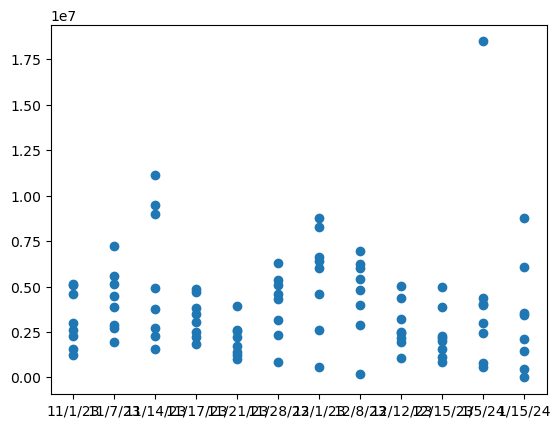

In [41]:
plt.plot_date(x = full_meta_data['date'], y = full_meta_data['Unmapped'])